# Project Speed Dating 💘
## The secret to a second date

This project analyses data coming from multilple speed dating experiments and tries to identify the factors influencing getting a match or not.

### Part 1: Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#setting personalised palette
soft = ['#FEF6B5', '#FFDD9A', '#FFC285', '#FFA679', '#FA8A76', '#F16D7A', '#E15383']
bold = ['#ff3366', '#ff4d4d', '#ff6633', '#ff801a', '#ff9900']
pio.templates["bold"] = go.layout.Template(
    layout_colorway=bold
)
pio.templates.default = "bold"
pio.renderers.default = "iframe"

In [2]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding = "ISO-8859-1")

#improve readability of colums
pd.set_option('display.max_columns', len(df.columns))
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

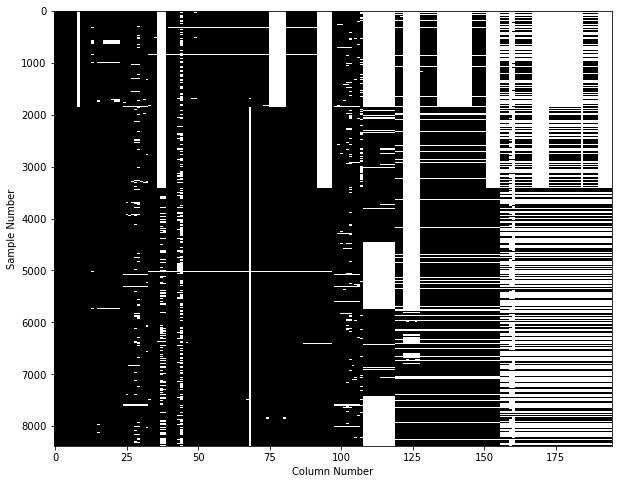

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.savefig('raw_data_sd.png')

In [5]:
pd.set_option('display.max_rows', None)
print("Percentage of missing values:")
display(100*(df.isnull().sum()/df.shape[0]))

Percentage of missing values:


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
wave         0.000000
round        0.000000
position     0.000000
positin1    22.033898
order        0.000000
partner      0.000000
pid          0.119360
match        0.000000
int_corr     1.885892
samerace     0.000000
age_o        1.241346
race_o       0.871330
pf_o_att     1.062306
pf_o_sin     1.062306
pf_o_int     1.062306
pf_o_fun     1.169730
pf_o_amb     1.277154
pf_o_sha     1.539747
dec_o        0.000000
attr_o       2.530437
sinc_o       3.425639
intel_o      3.652423
fun_o        4.296968
amb_o        8.617809
shar_o      12.843161
like_o       2.984006
prob_o       3.795655
met_o        4.595369
age          1.133922
field        0.751969
field_cd     0.978754
undergra    41.346383
mn_sat      62.604440
tuition     57.233230
race         0.751969
imprace      0.942946
imprelig     0.942946
from         0.942946
zipcode     12.699928
income      48.925758
goal      

We identify columns to delete. These columns are considered not of interest for the goal of the EDA and/or too incomplete and/or the answers are too varied to be able to descern valuable information.
They are: 
- ```positin1``` 22% missing values
- ```undergra``` 41% missing values
- ```mn_sat``` 63% missing values
- ```tuition``` 57% missing values
- ```from``` 1% missing values
- ```zipcode``` 13% missing values
- ```income``` 49% missing values
- ```expnum``` 79% missing values

More columns are removed because the data even if potentially of interest, they miss a lot of data as they relate to questions in the survey with a low rate of completion (the questions are asked moments or days after the speed meeting event).
They are: 
- ```attr1_s``` and its neighbors
- ```attr3_s```  and its neighbors
- ```satis_2``` and its neighbors
- ```numdat_2``` 
- ```attr7_2``` and its neighbors
- ```attr1_2``` and its neighbors
- ```attr4_2``` and its neighbors
- ```attr2_2 ``` and its neighbors
- ```attr3_2 ``` and its neighbors
- ```attr5_2 ``` and its neighbors
- ```you_call```
- ```them_cal```
- ```date_3```
- ```numdat_3```
- ```num_in_3```
- ```attr1_3 ``` and its neighbors
- ```attr7_3 ``` and its neighbors
- ```attr4_3 ``` and its neighbors
- ```attr2_3 ``` and its neighbors
- ```attr3 _3``` and its neighbors
- ```attr5_3 ``` and its neighbors

We also remove those rows where the individuals had a limited number of matches (```condtn = 1``` ). The limited choice could influence the decision of participants beyond the factors that we are interested in, which are the first impressions of speed dating. 

In [6]:
#delete columns
remove = ['positin1',
          'undergra',
          'mn_sat',
          'tuition',
          'from',
          'zipcode',
          'income',
          'expnum']

remove_index=[]

for i in remove:
    remove_index.append(df.columns.get_loc(i))

end_columns = list(range(df.columns.get_loc('attr1_s'),df.columns.get_loc('amb5_3')+1))
remove_index = remove_index + end_columns  

print("Shape before: ",df.shape) 
df_clean = df.drop(df.columns[remove_index], axis=1)
df_clean = df_clean.loc[df_clean['condtn']==2,:]
print("Shape after: ", df_clean.shape)

Shape before:  (8378, 195)
Shape after:  (6944, 100)


In [7]:
pd.set_option('display.max_rows', 15)

**In the next phase we do some more fine cleaning of the data**

In [8]:
#the id number of the last participant is missing but can be inferred by the pid of the dating session
display(df_clean.loc[8377,'id'])
df_clean.loc[df_clean['id'].isna(),'id']=22
display(df_clean.loc[8377,'id'])

nan

22.0

In [9]:
# finding the id of participants missing the age data
ids_age = df_clean.loc[df_clean['age'].isna(),'iid'].unique().tolist()

#displaying the corresponding rows
df_clean[df_clean['iid'].isin(ids_age)]

,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
5114,346,6.0,0,11,2,14,18,10,7,1,361.0,0,NaN,0,34.0,2.0,30.00,20.00,30.00,5.00,5.00,10.00,0,10.0,9.0,7.0,8.0,8.0,7.0,8.0,8.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,7.0,8.0,5.0,5.0,1.0,5.0,5.0,0.0,5.0
5115,346,6.0,0,11,2,14,18,10,1,2,362.0,0,NaN,0,30.0,2.0,20.51,14.53,24.79,17.09,5.98,17.09,1,8.0,8.0,7.0,7.0,7.0,8.0,8.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7.0,8.0,9.0,7.0,9.0,3.0,6.0,5.0,0.0,5.0
5116,346,6.0,0,11,2,14,18,10,16,3,363.0,0,NaN,0,23.0,4.0,25.00,20.00,20.00,20.00,5.00,10.00,1,7.0,7.0,8.0,7.0,7.0,8.0,8.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.0,10.0,10.0,6.0,10.0,0.0,7.0,2.0,0.0,5.0
5117,346,6.0,0,11,2,14,18,10,18,4,364.0,0,NaN,0,27.0,3.0,25.00,25.00,25.00,15.00,10.00,0.00,1,8.0,8.0,10.0,6.0,10.0,8.0,8.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6.0,7.0,8.0,8.0,6.0,5.0,6.0,4.0,0.0,5.0
5118,346,6.0,0,11,2,14,18,10,14,5,365.0,0,NaN,0,30.0,2.0,31.58,10.53,15.79,21.05,10.53,10.53,0,9.0,7.0,9.0,9.0,9.0,8.0,9.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8.0,10.0,10.0,10.0,8.0,8.0,9.0,6.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,512,4.0,0,7,2,21,22,7,21,18,548.0,0,-0.19,1,30.0,2.0,40.00,10.00,20.00,10.00,0.00,20.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFA Acting Program,15.0,2.0,1.0,1.0,1.0,3.0,2.0,Actress,6.0,1.0,1.0,1.0,8.0,9.0,10.0,8.0,0.0,9.0,9.0,6.0,10.0,9.0,7.0,10.0,5.0,5.0,NaN,20.0,20.0,20.0,20.0,5.0,15.0,50.0,5.0,5.0,20.0,10.0,10.0,50.0,5.0,5.0,20.0,10.0,10.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,7.0,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7494,512,4.0,0,7,2,21,22,7,1,19,549.0,0,0.26,1,28.0,2.0,20.00,20.00,20.00,20.00,0.00,20.00,1,8.0,8.0,6.0,7.0,7.0,6.0,8.0,5.0,2.0,NaN,MFA Acting Program,15.0,2.0,1.0,1.0,1.0,3.0,2.0,Actress,6.0,1.0,1.0,1.0,8.0,9.0,10.0,8.0,0.0,9.0,9.0,6.0,10.0,9.0,7.0,10.0,5.0,5.0,NaN,20.0,20.0,20.0,20.0,5.0,15.0,50.0,5.0,5.0,20.0,10.0,10.0,50.0,5.0,5.0,20.0,10.0,10.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,7.0,6.0,0,7.0,9.0,9.0,6.0,8.0,7.0,5.0,5.0,0.0,NaN
7495,512,4.0,0,

In [10]:
# finding the id of participants missing the race data
ids_race = df_clean.loc[df_clean['race'].isna(),'iid'].unique().tolist()

#display the corresponding rows
df_clean[df_clean['iid'].isin(ids_age) | df_clean['pid'].isin(ids_age)]

,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
5114,346,6.0,0,11,2,14,18,10,7,1,361.0,0,NaN,0,34.0,2.0,30.00,20.00,30.00,5.00,5.00,10.00,0,10.0,9.0,7.0,8.0,8.0,7.0,8.0,8.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,7.0,8.0,5.0,5.0,1.0,5.0,5.0,0.0,5.0
5115,346,6.0,0,11,2,14,18,10,1,2,362.0,0,NaN,0,30.0,2.0,20.51,14.53,24.79,17.09,5.98,17.09,1,8.0,8.0,7.0,7.0,7.0,8.0,8.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7.0,8.0,9.0,7.0,9.0,3.0,6.0,5.0,0.0,5.0
5116,346,6.0,0,11,2,14,18,10,16,3,363.0,0,NaN,0,23.0,4.0,25.00,20.00,20.00,20.00,5.00,10.00,1,7.0,7.0,8.0,7.0,7.0,8.0,8.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5.0,10.0,10.0,6.0,10.0,0.0,7.0,2.0,0.0,5.0
5117,346,6.0,0,11,2,14,18,10,18,4,364.0,0,NaN,0,27.0,3.0,25.00,25.00,25.00,15.00,10.00,0.00,1,8.0,8.0,10.0,6.0,10.0,8.0,8.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6.0,7.0,8.0,8.0,6.0,5.0,6.0,4.0,0.0,5.0
5118,346,6.0,0,11,2,14,18,10,14,5,365.0,0,NaN,0,30.0,2.0,31.58,10.53,15.79,21.05,10.53,10.53,0,9.0,7.0,9.0,9.0,9.0,8.0,9.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8.0,10.0,10.0,10.0,8.0,8.0,9.0,6.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,548,18.0,1,36,2,21,22,7,21,4,512.0,0,-0.19,1,NaN,2.0,20.00,20.00,20.00,20.00,5.00,15.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,Business,8.0,2.0,8.0,8.0,1.0,6.0,1.0,Management,7.0,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0,7.0,40.0,10.0,20.0,10.0,0.0,20.0,60.0,0.0,0.0,20.0,0.0,20.0,30.0,20.0,20.0,0.0,10.0,20.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
8293,549,19.0,1,38,2,21,22,7,1,4,512.0,0,0.26,1,NaN,2.0,20.00,20.00,20.00,20.00,5.00,15.00,0,7.0,9.0,9.0,6.0,8.0,7.0,5.0,5.0,2.0,28.0,General management/finance,8.0,2.0,2.0,3.0,1.0,7.0,1.0,General management/consulting,7.0,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0,5.0,20.0,20.0,20.0,20.0,0.0,20.0,50.0,10.0,5.0,20.0,5.0,10.0,35.0,10.0,10.0,15.0,20.0,10.0,7.0,10.0,8.0,9.0,9.0,7.0,10.0,10.0,7.0,7.0,1,8.0,8.0,6.0,7.0,7.

In [11]:
#removing rows involving participants with missing age
to_remove = df_clean['iid'].isin(ids_age) | df_clean['pid'].isin(ids_age)
display(df_clean.shape)
df_clean = df_clean.loc[~to_remove,:]
display(df_clean.shape)

(6944, 100)

(6864, 100)

In [12]:
#one participant studies "Operations Research" and has not filled the corresponding field code
df_clean.loc[df_clean['field_cd'].isna(),'field'].value_counts()

Operations Research    19
Name: field, dtype: int64

In [13]:
# assigning field_cd=2 to the participant (corresponding to Math)
df_clean.loc[df_clean['field_cd'].isna(),'field_cd'] = 2 

In [14]:
#remove rows with a missing "pid" (impossible to infer from surrounding data)
df_clean[df_clean['pid'].isna()]
to_remove = df_clean['pid'].isna()
df_clean = df_clean.loc[~to_remove,:]

In [15]:
#fill missing age data with median (26)
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['age_o'] = df_clean['age_o'].fillna(df_clean['age'].median())

In [16]:
#fill NA values with 0 in rows where the sum of scores is 100 
score_columns = ['pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']

df_clean.loc[df_clean[score_columns].sum(axis=1)==100, score_columns] =  df_clean[score_columns].fillna(0)
df_clean.loc[df_clean[score_columns].sum(axis=1)==100, score_columns]

,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
200,25.0,20.0,25.0,20.0,10.0,0.0
201,30.0,20.0,10.0,30.0,0.0,10.0
202,20.0,25.0,20.0,15.0,10.0,10.0
203,25.0,35.0,30.0,10.0,0.0,0.0
205,25.0,15.0,25.0,15.0,0.0,20.0
...,...,...,...,...,...,...
8372,10.0,15.0,30.0,20.0,15.0,10.0
8374,50.0,20.0,10.0,5.0,10.0,5.0
8375,40.0,10.0,30.0,10.0,10.0,0.0
8376,10.0,25.0,25.0,10.0,10.0,20.0


In [17]:
score_columns = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
df_clean.loc[df_clean[score_columns].sum(axis=1)==100, score_columns] =  df_clean[score_columns].fillna(0)
pd.set_option('display.max_rows', 15)

In [18]:
score_columns = ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']
df_clean.loc[df_clean[score_columns].sum(axis=1)==100, score_columns] =  df_clean[score_columns].fillna(0)
pd.set_option('display.max_rows', 15)

In [19]:
score_columns = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'] 
df_clean.loc[df_clean[score_columns].sum(axis=1)==100, score_columns] =  df_clean[score_columns].fillna(0)
pd.set_option('display.max_rows', 15)

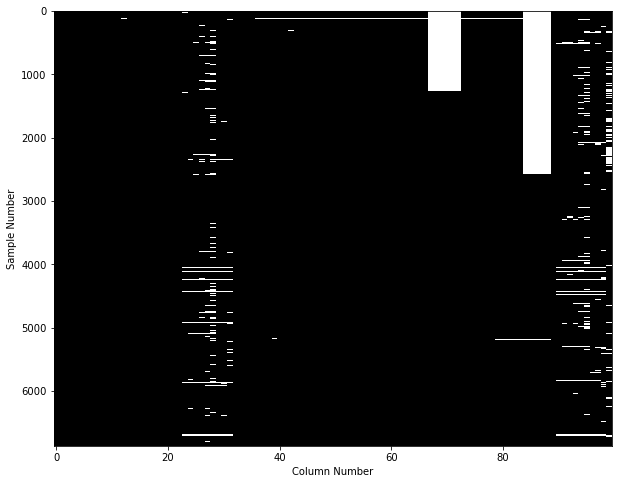

In [20]:
#display cleaner data
plt.figure(figsize=(10, 8))
plt.imshow(df_clean.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.savefig('clean_data_sd.png')

### Part 2: analysis demographic data and the effect on matches

In [21]:
#create a subdataset with age and race of participants and other demographic/personal data
demographic_data = df_clean.loc[:,['iid', 
                  'id', 
                  'gender', 
                  'age',
                  'race', 
                  'partner', 
                  'pid',
                  'dec',
                  'dec_o',
                  'match',
                  'int_corr', 
                  'samerace',
                  'age_o', 
                  'race_o', 
                  'field', 
                  'field_cd']]

# convert gender data from 0/1 to F/M 
demographic_data['gender_st'] = demographic_data['gender'].map({0:'F', 1: 'M'})

# create an explicit column for race and field
demographic_data['race_name'] = demographic_data['race'].map({1:'Black/African American', 
                                                              2: 'European/Caucasian-American', 
                                                              3:'Latino/Hispanic American',
                                                              4:'Asian/Pacific Islander/Asian-American',
                                                              5:'Native American',
                                                              6:'Others'
                                                             })
demographic_data['field'] = demographic_data['field_cd'].map({1:'Law', 
                                                              2:'Math', 
                                                              3:'Social Science, Psychologist',
                                                              4:'Medical Science, Pharmaceuticals, and Bio Tech',
                                                              5:'Engineering',
                                                              6:'English/Creative Writing/ Journalism',
                                                              7: 'History/Religion/Philosophy', 
                                                              8: 'Business/Econ/Finance',
                                                              9: 'Education, Academia', 
                                                              10: 'Biological Sciences/Chemistry/Physics',
                                                              11: 'Social Work', 
                                                              12: 'Undergrad/undecided', 
                                                              13:'Political Science/International Affairs', 
                                                              14:'Film',
                                                              15:'Fine Arts/Arts Administration',
                                                              16:'Languages',
                                                              17:'Architecture',
                                                              18:'Other'
                                                             })

In [22]:
#rearrange the demographic dataset for readability
demographic_data = demographic_data[['iid',
                                     'gender', 
                                     'gender_st',
                                     'age',
                                     'race',
                                     'race_name',
                                     'partner',
                                     'pid', 
                                     'dec', 
                                     'dec_o',
                                     'match',
                                     'int_corr',
                                     'samerace', 
                                     'age_o',
                                     'race_o',
                                     'field',
                                     'field_cd']]

#create a dataset that contains unique rows for each participant
dem_unique = demographic_data.drop_duplicates(subset='iid')
dem_unique = dem_unique.drop(['partner','pid', 'match','samerace','age_o','race_o', 'int_corr'], axis=1)

In [23]:
dem_unique.groupby('gender_st')['age'].median()

gender_st
F    26.0
M    27.0
Name: age, dtype: float64

In [24]:
df = px.data.tips()
fig = px.histogram(dem_unique, x="age", color="gender_st", opacity = 0.8, barmode= 'group', color_discrete_sequence=[bold[0], bold[4]])
fig.show()

In [25]:
fig = px.scatter(demographic_data, x="age", y="age_o", facet_row="gender_st", 
                 color=demographic_data['dec'].astype(str),
                 marginal_y="violin", 
                 trendline = 'ols',
                 opacity = 0.7, color_discrete_sequence=[bold[0], bold[4]],
                 labels={
                     "age_o": "Age of partner",
                     "age": "Age",
                     "color" : "Decision",
                     "gender_st" : "Gender"
                 },
                title = "The choice of men and women is not influenced by age")

fig.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [26]:
#make a pie chart of races
dr = dem_unique.groupby('gender_st')['race_name'].value_counts(normalize=True)
dr = np.round(dr*100,2)
dr = dr.to_frame()
dr.index.set_names(['gender', 'race'], inplace=True)
dr.columns = ['percentage']
dr = dr.reset_index(level =[0,1])

In [27]:
labels = dr.race[0:5].tolist()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Females', 'Males'])
fig.add_trace(go.Pie(labels=labels, values=dr.percentage[0:5].tolist(), name="Females"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=dr.percentage[5:].tolist(), name="Males"),
              1, 2)

fig.update_traces(hoverinfo="label+percent+name")

fig.update_layout(
    title_text= "Participants are predominantly white, and the proportion of BIPOCs is slightly higher in women ")
fig.show()

In [28]:
#find relationship between race and match

fig = px.histogram(demographic_data, x="samerace", color="dec", 
                   barmode='group', barnorm='percent', 
                   color_discrete_sequence=[bold[0], bold[4]],
                   labels={
                     "samerace": "Partner of same race",
                     "dec" : "Decision"},
                   text_auto=True,
                   title = "The choice of participants is slightly influenced by race",
                  )

fig.update_xaxes(categoryorder="total ascending")

fig.show()

In [29]:
fig = px.histogram(demographic_data, x="race_name", color="dec", facet_col='samerace', 
                   barmode='group', barnorm='percent', 
                   color_discrete_sequence=[bold[0], bold[4]],
                   labels={
                     "samerace": "Partner of same race",
                     "race_name": " ",
                     "dec" : "Decision"},
                   text_auto=True,
                   title = "A favorable choice towards a partner of the same race increases in black, white and latino participants",
                  )

fig.update_layout(margin = {'b': 150})

fig.show()

In [30]:
#make a pie chart of races
fields = dem_unique.groupby('gender_st')['field'].value_counts(normalize=True)
fields = np.round(fields*100,2)
fields = fields.to_frame()
fields.index.set_names(['gender', 'field'], inplace=True)
fields.columns = ['percentage']
fields = fields.reset_index(level =[0,1])

In [31]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Females', 'Males'])

fig.add_trace(go.Pie(labels = fields[fields['gender']=='F'].field.tolist(), 
                     values=fields[fields['gender']=='F'].percentage.tolist(), 
                     name="Females",
                    ),
              1, 1)
fig.add_trace(go.Pie(labels = fields[fields['gender']=='M'].field.tolist(), 
                     values=fields[fields['gender']=='M'].percentage.tolist(),
                     name="Males"
                    ),
              1, 2)

fig.update_traces(hoverinfo="label+percent+name")

fig.update_layout(title_text= "Fields of study by gender")
fig.show()

In [32]:
demographic_data[(demographic_data['dec_o']==0)&(demographic_data['gender_st']=='F')].groupby('field')['dec_o'].value_counts()[:5]

field                                  dec_o
Biological Sciences/Chemistry/Physics  0        212
Business/Econ/Finance                  0        127
Education, Academia                    0        311
Engineering                            0        108
English/Creative Writing/ Journalism   0        141
Name: dec_o, dtype: int64

In [33]:
demographic_data[(demographic_data['dec_o']==1)&(demographic_data['gender_st']=='F')].groupby('field')['dec_o'].value_counts()[:5]

field                                  dec_o
Biological Sciences/Chemistry/Physics  1        206
Business/Econ/Finance                  1        195
Education, Academia                    1        197
Engineering                            1         55
English/Creative Writing/ Journalism   1        103
Name: dec_o, dtype: int64

In [34]:
demographic_data[(demographic_data['dec_o']==0)&(demographic_data['gender_st']=='M')].groupby('field')['dec_o'].value_counts()[:5]

field                                  dec_o
Biological Sciences/Chemistry/Physics  0        307
Business/Econ/Finance                  0        733
Education, Academia                    0         52
Engineering                            0        360
English/Creative Writing/ Journalism   0         22
Name: dec_o, dtype: int64

In [35]:
demographic_data[(demographic_data['dec_o']==1)&(demographic_data['gender_st']=='M')].groupby('field')['dec_o'].value_counts()[:5]

field                                  dec_o
Biological Sciences/Chemistry/Physics  1        173
Business/Econ/Finance                  1        492
Education, Academia                    1         21
Engineering                            1        153
English/Creative Writing/ Journalism   1          8
Name: dec_o, dtype: int64

The top five fields among participants that received either a positive or negative response from their partner are the same. 

### Part 3: Analyzing personal preferences and traits


In [36]:
# select columns of interest for next phase of anaylis.
sentiment_clean = df_clean[['iid', 
                            'id', 
                            'gender', 
                            'wave', 
                            'pid', 
                            'match', 
                            'int_corr',
                            'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb','pf_o_sha', 
                            'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','shar_o', 
                            'like_o', 
                            'prob_o', 
                            'met_o', 
                            'imprace', 
                            'imprelig', 
                            'goal', 
                            'date', 
                            'go_out', 
                            'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
                            'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
                            'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
                            'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1',
                            'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 
                            'dec', 'attr', 'sinc','intel', 'fun', 'amb', 'shar', 
                            'like', 
                            'prob', 
                            'met']]

In [37]:
#remove rows relating to participant 28 (very low questionary completion)
sentiment_clean = sentiment_clean.loc[((df_clean['iid']!= 28)&(df_clean['pid']!= 28)),:]
sentiment_clean.shape

(6832, 66)

In [38]:
#fill missing scoring with median
columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
sentiment_clean[columns] = sentiment_clean[columns].fillna(sentiment_clean[columns].median())

In [39]:
preferences = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']
sentiment_clean[preferences] = sentiment_clean[preferences].fillna(sentiment_clean[preferences].median())

In [40]:
columns = ['like_o', 'prob_o', 'met_o', 'like', 'prob', 'met', 'date']
sentiment_clean[columns] = sentiment_clean[columns].fillna(sentiment_clean[columns].median())

In [41]:
pd.set_option('display.max_rows', None)
print("Percentage of missing values:")
display(100*(sentiment_clean.isnull().sum()/sentiment_clean.shape[0]))

Percentage of missing values:


iid          0.000000
id           0.000000
gender       0.000000
wave         0.000000
pid          0.000000
match        0.000000
int_corr     0.000000
pf_o_att     0.000000
pf_o_sin     0.000000
pf_o_int     0.000000
pf_o_fun     0.000000
pf_o_amb     0.000000
pf_o_sha     0.000000
dec_o        0.000000
attr_o       0.000000
sinc_o       0.000000
intel_o      0.000000
fun_o        0.000000
amb_o        0.000000
shar_o       0.000000
like_o       0.000000
prob_o       0.000000
met_o        0.000000
imprace      0.000000
imprelig     0.000000
goal         0.000000
date         0.000000
go_out       0.000000
attr1_1      0.000000
sinc1_1      0.000000
intel1_1     0.000000
fun1_1       0.000000
amb1_1       0.000000
shar1_1      0.000000
attr4_1     17.915691
sinc4_1     17.915691
intel4_1    17.915691
fun4_1      17.915691
amb4_1      17.915691
shar4_1     17.915691
attr2_1      0.000000
sinc2_1      0.000000
intel2_1     0.000000
fun2_1       0.000000
amb2_1       0.000000
shar2_1   

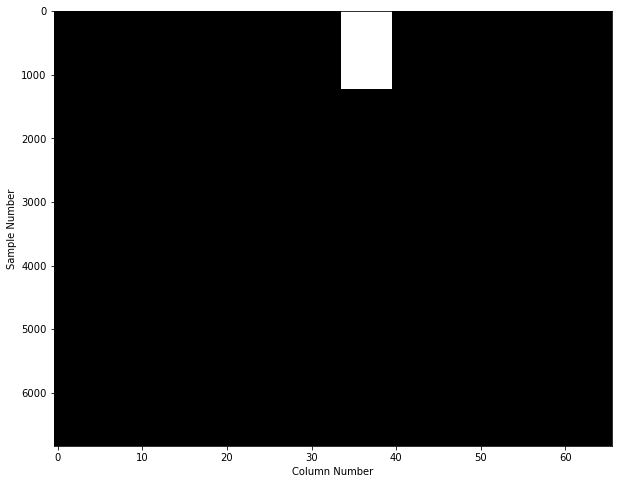

In [42]:
plt.figure(figsize=(10, 8))
plt.imshow(sentiment_clean.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.savefig('sentiment_data_sd.png')

In [43]:
# show int corr for match and no match

fig = px.box(sentiment_clean, x="match", y="int_corr", color='match', points="outliers")
fig.show()

In [44]:
from scipy.stats import ttest_ind

match = sentiment_clean[sentiment_clean['match']==1]
no_match = sentiment_clean[sentiment_clean['match']==0]

print(f"Average interest correlation for matches: {np.round(match['int_corr'].mean(),3)}")
print(f"Average interest correlation for missed matches: {np.round(no_match['int_corr'].mean(), 3)}")

p = ttest_ind(match['int_corr'], no_match['int_corr'])[1]
def significance(x):
    if x < 0.001:
        return "highly significant"
    elif x < 0.01:
        return "very significant"
    elif x < 0.05:
        return "significant"
    else:
        return "non significant"
    
print(f"The difference is {significance(p)}")


Average interest correlation for matches: 0.226
Average interest correlation for missed matches: 0.197
The difference is very significant


In [45]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("What do you look for in the opposite sex?", 
                                                    "What do you think the opposite sex looks for?"),
                    specs=[[{"type": "scatterpolar"}, {"type": "scatterpolar"}]],
                    horizontal_spacing = 0.25
)

categories = ['Attractive','Sincere','Intelligent','Fun', 'Ambicious', 'Shares interests']
qualities1 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
qualities2 = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']


fig.add_trace(go.Scatterpolar(
      r=sentiment_clean[(sentiment_clean['gender']==0)][qualities1].mean().tolist(),
      theta=categories,
      marker = dict(color = bold[3]),
      fill='toself',
      name='Females'),
             row=1, col=1)

fig.add_trace(go.Scatterpolar(
      r=sentiment_clean[(sentiment_clean['gender']==1)][qualities1].mean().tolist(),
      theta=categories,
    marker = dict(color = bold[0]),
      fill='toself',
      name='Males'),
             row=1, col=1)

fig.add_trace(go.Scatterpolar(
      r=sentiment_clean[(sentiment_clean['gender']==0)][qualities2].mean().tolist(),
      theta=categories,
      marker = dict(color = bold[0]),
      fill='toself',
      name='Females'),
             row=1, col=2)
              
fig.add_trace(go.Scatterpolar(
      r=sentiment_clean[(sentiment_clean['gender']==1)][qualities2].mean().tolist(),
      theta=categories,
    marker = dict(color = bold[3]),
      fill='toself',
      name='Males'),
             row=1, col=2)

fig.update_layout(
    polar=dict(
    radialaxis=dict(
      visible=True,
        range=[0,40]
    )),
    polar2=dict(
    radialaxis=dict(
      visible=True,
        range=[0,40]
    )),
  showlegend=False
)
fig.layout.annotations[0].update(y=1.1)
fig.layout.annotations[1].update(y=1.1)

fig.show()

In [46]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("How do you rate your date? (decision is Yes)", 
                                                    "How do you rate your date? (decision is No)"),
                    specs=[[{"type": "scatterpolar"}, {"type": "scatterpolar"}]],
)

categories = ['Attractiveness','Sincere','Intelligent','Fun', 'Ambicious', 'Shares interests']
qualities = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']


fig.add_trace(go.Scatterpolar(
     r=sentiment_clean[(sentiment_clean['gender']==0)&(sentiment_clean['dec']==1)][qualities].mean().tolist(),
      theta=categories,
      marker = dict(color = bold[3]),
      fill='toself',
      name='Females'),
             row=1, col=1)

fig.add_trace(go.Scatterpolar(
     r=sentiment_clean[(sentiment_clean['gender']==1)&(sentiment_clean['dec']==1)][qualities].mean().tolist(),
      theta=categories,
    marker = dict(color = bold[0]),
      fill='toself',
      name='Males'),
             row=1, col=1)

fig.add_trace(go.Scatterpolar(
      r=sentiment_clean[(sentiment_clean['gender']==0)&(sentiment_clean['dec']==0)][qualities].mean().tolist(),
      theta=categories,
      marker = dict(color = bold[3]),
      fill='toself',
      name='Females'),
             row=1, col=2)
              
fig.add_trace(go.Scatterpolar(
      r=sentiment_clean[(sentiment_clean['gender']==1)&(sentiment_clean['dec']==0)][qualities].mean().tolist(),
      theta=categories,
    marker = dict(color = bold[0]),
      fill='toself',
      name='Males'),
             row=1, col=2)

fig.update_layout(polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,10]
        )),
                  polar2=dict(
                      radialaxis=dict(
                          visible=True,
                          range=[0,10]
                      )),
                  showlegend=False
)

fig.layout.annotations[0].update(y=1.1)
fig.layout.annotations[1].update(y=1.1)

fig.show()

In [47]:
religion_matches = sentiment_clean.groupby('imprelig')['match'].sum()/sentiment_clean['imprelig'].value_counts()

fig = px.bar(x=religion_matches.index, y=religion_matches.values)

fig.update_layout(
    title="No linear relationship between relation to religion and number of matches",
    xaxis_title="Importance that a person you date be of the same racial/ethnic background?",
    yaxis_title="Percentage of matches",

)
fig.show()

In [48]:
race_matches = sentiment_clean.groupby('imprace')['match'].sum()/sentiment_clean['imprace'].value_counts()

fig = px.bar(x=race_matches.index, y=race_matches.values)

fig.update_layout(
    title="No linear relationship between relation to religion and number of matches",
    xaxis_title="Importance that a person you date be of the same religious background?",
    yaxis_title="Percentage of matches",

)
fig.show()

In [49]:
goal_matches = sentiment_clean.groupby('goal')['match'].sum()/sentiment_clean['goal'].value_counts()
goal_matches.index = ["Seemed like a fun night out", 
                     "To meet new people",
                     "To get a date", 
                     "Looking for a serious relationship",
                     "To say I did it",
                     "Other"]

fig = px.bar(x=goal_matches.index, y=goal_matches.values)

fig.update_layout(
    title="Having high dating expectations reduces matching chances",
    xaxis_title="What's your goal for tonight?",
    yaxis_title="Percentage of matches"
)

fig.update_layout(margin = {'b': 150})
fig.show()

In [50]:
date_matches = sentiment_clean.groupby('date')['match'].sum()/sentiment_clean['date'].value_counts()
date_matches.index = ["Several times a week",
                      "Twice a week",
                      "Once a week",
                      "Twice a month", 
                      "Once a month",
                      "Several times a year",
                      "Almost never"
                    ]

fig = px.bar(x=date_matches.index, y=date_matches.values)

fig.update_layout(
    title="Having dating experience helps getting a date",
    xaxis_title="How often do you go on dates?",
    yaxis_title="Percentage of matches",

)
fig.show()

In [51]:
goout_matches = sentiment_clean.groupby('go_out')['match'].sum()/sentiment_clean['go_out'].value_counts()
goout_matches.index = ["Several times a week",
                      "Twice a week",
                      "Once a week",
                      "Twice a month", 
                      "Once a month",
                      "Several times a year",
                      "Almost never"
                    ]

fig = px.bar(x=goout_matches.index, y=goout_matches.values)


fig.update_layout(
    title="Being more social helps getting a date",
    xaxis_title="How often do you go out?",
    yaxis_title="Percentage of matches",

)
fig.show()

### Part 4: Conclusions

In conclusion several things can help in getting a date:
- let go of your biases, try to go beyond race and age
- being more social in general and going on dates often can increases your confidence and ability to find a date
- look for people that share your interests
- being attractive is not just about looks. Developing your sense of humor, being sincere and smart will make you look more attractive overall